In [1]:
import pandas as pd
import numpy as np

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [10]:
df = pd.read_excel("HCMWeatherDaily.xlsx")
df["datetime"] = pd.to_datetime(df["datetime"])
df = df.sort_values("datetime")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3934 entries, 0 to 3933
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              3934 non-null   object        
 1   datetime          3934 non-null   datetime64[ns]
 2   tempmax           3934 non-null   float64       
 3   tempmin           3934 non-null   float64       
 4   temp              3934 non-null   float64       
 5   feelslikemax      3934 non-null   float64       
 6   feelslikemin      3934 non-null   float64       
 7   feelslike         3934 non-null   float64       
 8   dew               3934 non-null   float64       
 9   humidity          3934 non-null   float64       
 10  precip            3933 non-null   float64       
 11  precipprob        3934 non-null   int64         
 12  precipcover       3934 non-null   float64       
 13  preciptype        3013 non-null   object        
 14  snow              3934 n

Feature Type Identification

In [16]:
# Convert datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

# List of numeric and object (string) columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numeric columns:", {len(numeric_cols): numeric_cols})
print("Categorical columns:", {len(categorical_cols): categorical_cols})

Numeric columns: {24: ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'moonphase']}
Categorical columns: {8: ['name', 'preciptype', 'sunrise', 'sunset', 'conditions', 'description', 'icon', 'stations']}


In [19]:
# Check the number of null values per column (initial status)
missing_counts = df.isnull().sum().sort_values(ascending=False)
missing_perc = (df.isnull().mean()*100).sort_values(ascending=False)
print("\nTop columns with most missing values (count):")
print(missing_counts.head(10))
print("\nTop columns with most missing values (percent):")
print(missing_perc.head(10))


Top columns with most missing values (count):
severerisk        2566
preciptype         921
precip               1
uvindex              0
cloudcover           0
visibility           0
solarradiation       0
solarenergy          0
name                 0
winddir              0
dtype: int64

Top columns with most missing values (percent):
severerisk        65.226233
preciptype        23.411286
precip             0.025419
uvindex            0.000000
cloudcover         0.000000
visibility         0.000000
solarradiation     0.000000
solarenergy        0.000000
name               0.000000
winddir            0.000000
dtype: float64


Handle Missing Values & Drop Unneeded Columns

In [22]:
# List the columns to remove
columns_to_drop = [
    'snow', 'snowdepth', 'name', 'stations',
    'description', 'severerisk'
]

# Remove these columns
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

print(f"Original number of columns: {df.shape[1]}")
print(f"Number of columns after removal: {df_cleaned.shape[1]}")


Original number of columns: 33
Number of columns after removal: 27


Remove:

- Columns with too many missing and irrelevant values ​​(e.g. `snow`).

- Metadata columns that are not specific (e.g. `name`, `stations`).

- Text description columns (e.g. `description`) because we already have conditions and icon columns.

In [25]:
# Handling missing values
for col in df_cleaned.columns:
    if df_cleaned[col].dtype in ['float64', 'int64']:
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())
    else:
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])

print("\nNumber of missing values after imputation:")
print(df_cleaned.isnull().sum().sum()) # Should be 0


Number of missing values after imputation:
0


- Numerical: Use the median to avoid the influence of outliers (e.g., an unusually sunny day).

- Categorical: Use the most frequently occurring value (mode).

Correlation Matrix

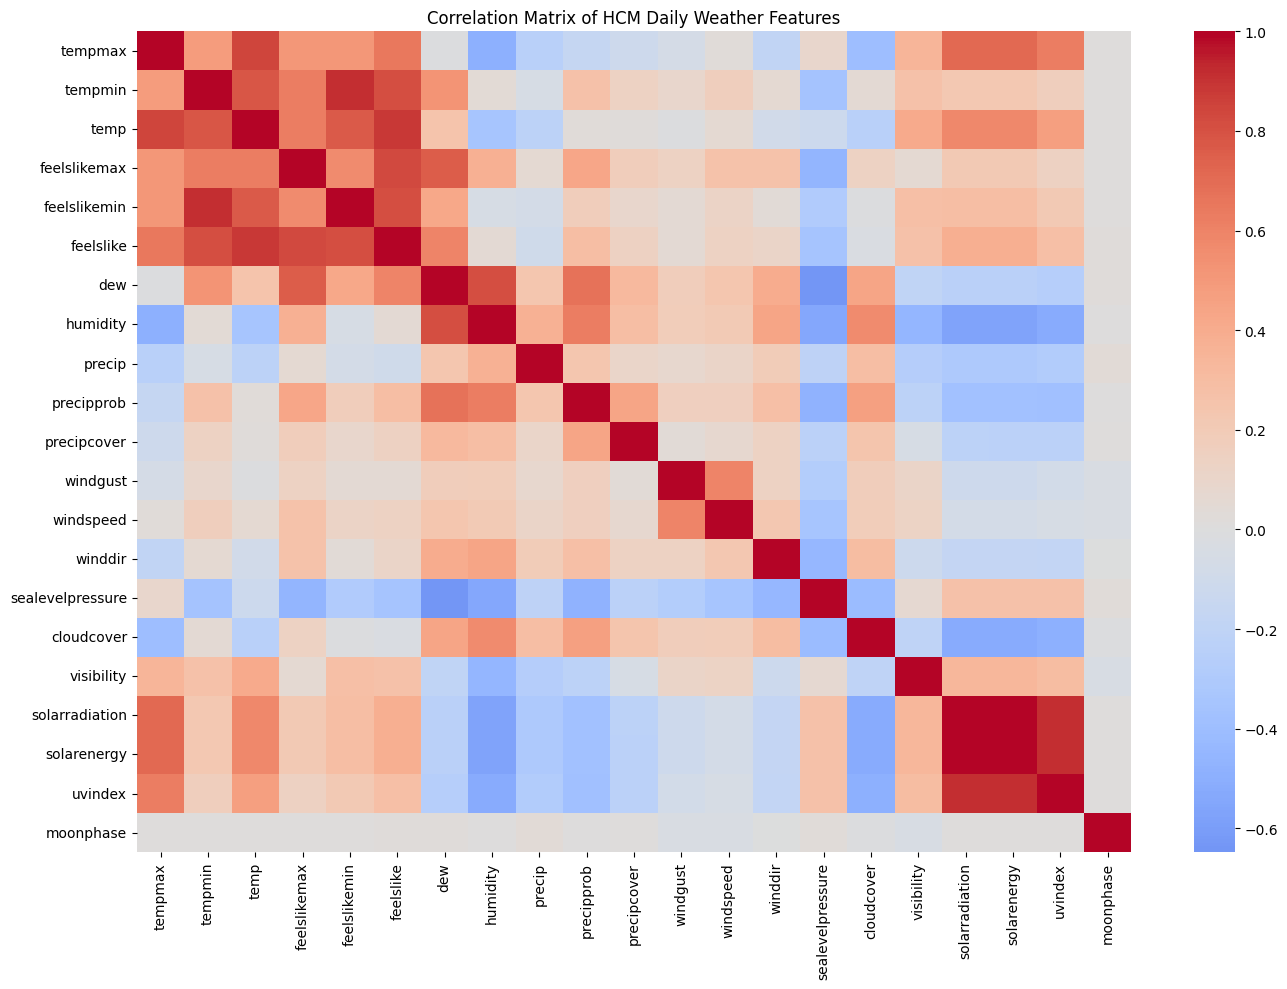

In [28]:
# Calculate and plot the correlation matrix between numerical features
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()

corr_matrix = df_cleaned[numeric_cols].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of HCM Daily Weather Features")
plt.tight_layout()
plt.show()

In [31]:
corr_matrix

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase
tempmax,1.000000,0.487234,0.841516,0.516415,0.508098,0.649398,-0.008710,-0.489181,-0.246136,-0.170925,...,-0.067988,0.029428,-0.185429,0.087515,-0.401027,0.346607,0.715861,0.714764,0.622385,0.014188
tempmin,0.487234,1.000000,0.783958,0.629105,0.916150,0.814894,0.528007,0.043307,-0.054397,0.271445,...,0.090764,0.163662,0.054365,-0.358704,0.051735,0.267939,0.223705,0.223248,0.163538,0.012919
temp,0.841516,0.783958,1.000000,0.620371,0.767856,0.889542,0.253091,-0.342259,-0.222944,0.029678,...,-0.016380,0.055540,-0.094130,-0.123973,-0.246168,0.409141,0.581549,0.580570,0.473779,0.014391
feelslikemax,0.516415,0.629105,0.620371,1.000000,0.568571,0.827048,0.761780,0.377247,0.056002,0.431649,...,0.139179,0.260460,0.263945,-0.461317,0.138811,0.055253,0.212132,0.210579,0.144668,0.013410
feelslikemin,0.508098,0.916150,0.767856,0.568571,1.000000,0.813197,0.420718,-0.049844,-0.074800,0.175394,...,0.050538,0.121432,0.035870,-0.292335,-0.006859,0.279205,0.288184,0.287813,0.211948,0.010090
feelslike,0.649398,0.814894,0.889542,0.827048,0.813197,1.000000,0.594755,0.047523,-0.098189,0.292089,...,0.051445,0.141515,0.114411,-0.353800,-0.024287,0.269986,0.387970,0.386763,0.284494,0.018475
dew,-0.008710,0.528007,0.253091,0.761780,0.420718,0.594755,1.000000,0.818493,0.235962,0.677959,...,0.179099,0.236981,0.399620,-0.647965,0.442111,-0.201431,-0.236222,-0.237125,-0.258789,0.016939
humidity,-0.489181,0.043307,-0.342259,0.377247,-0.049844,0.047523,0.818493,1.000000,0.369582,0.628018,...,0.187946,0.202432,0.439891,-0.550752,0.562440,-0.452402,-0.565079,-0.565355,-0.522943,0.007531
precip,-0.246136,-0.054397,-0.222944,0.056002,-0.074800,-0.098189,0.235962,0.369582,1.000000,0.236725,...,0.081410,0.112749,0.190525,-0.216415,0.293604,-0.271597,-0.311208,-0.310922,-0.283983,0.035417
precipprob,-0.170925,0.271445,0.029678,0.431649,0.175394,0.292089,0.677959,0.628018,0.236725,1.000000,...,0.161375,0.162221,0.285207,-0.478618,0.465557,-0.218183,-0.373584,-0.374189,-0.381174,0.005850


- Some variables have very strong positive correlations with each other, e.g. `temp` and `tempmax`, `solarenergy` and `uvindex`. This makes sense since these factors are directly related to temperature and solar radiation.

- Some variables have negative correlations, e.g. `humidity` and `solarenergy`, indicating that when humidity is high (rainy season), solar energy received will be lower due to cloudiness.

- Some variables have almost no correlation with each other, e.g. `windspeed` with temperature, indicating that wind does not have much influence on the average daily temperature in Ho Chi Minh City.

Check outliers and post-normalization data distribution

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df_cleaned.copy()
numeric_cols = df_scaled.select_dtypes(include=['float64', 'int64']).columns.tolist()

df_scaled[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])

# Draw boxplots to check for outliers for standardized variables.
plt.figure(figsize=(15, 6))
df_scaled[numeric_cols].boxplot(rot=90)
plt.title("Boxplot of Standardized Variables - Outlier Detection")
plt.tight_layout()
plt.show()

- A boxplot helps to detect outliers in each variable after standardization. If there are many points outside the "whiskers" of the boxplot, it is a sign of an outlier. However, having some outliers is normal with real meteorological data.

In [40]:
# Check the Outliers ratio using IQR method
# Identify values ​​that fall outside the range [Q1 - 1.5IQR, Q3 + 1.5IQR] for each variable.
outlier_counts = {}
total_rows = df_scaled.shape[0]

for col in numeric_cols:
    Q1 = df_scaled[col].quantile(0.25)
    Q3 = df_scaled[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df_scaled[col] < lower) | (df_scaled[col] > upper)).sum()
    outlier_counts[col] = outliers

# Total outliers and percentages
total_outliers = sum(outlier_counts.values())
percent_outliers = total_outliers / (total_rows * len(numeric_cols)) * 100

print("Percentage of outliers in total values:", round(percent_outliers, 2), "%")
print("Number of outliers per variable:", outlier_counts)

Percentage of outliers in total values: 4.59 %
Number of outliers per variable: {'tempmax': 69, 'tempmin': 55, 'temp': 52, 'feelslikemax': 41, 'feelslikemin': 697, 'feelslike': 38, 'dew': 144, 'humidity': 0, 'precip': 436, 'precipprob': 943, 'precipcover': 590, 'windgust': 135, 'windspeed': 233, 'winddir': 0, 'sealevelpressure': 31, 'cloudcover': 14, 'visibility': 74, 'solarradiation': 85, 'solarenergy': 84, 'uvindex': 68, 'moonphase': 0}


In [43]:
# Tính phần trăm outlier cho từng cột và hiển thị sắp xếp giảm dần
numeric_cols = df_scaled.select_dtypes(include=['float64', 'int64']).columns.tolist()
total_rows = df_scaled.shape[0]

outlier_pct = {}
for col in numeric_cols:
    Q1 = df_scaled[col].quantile(0.25)
    Q3 = df_scaled[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df_scaled[col] < lower) | (df_scaled[col] > upper)).sum()
    outlier_pct[col] = outliers / total_rows * 100

# Hiển thị theo thứ tự giảm dần, và các cột có % > tổng (ví dụ 4.59)
import pandas as pd
outlier_df = pd.Series(outlier_pct).sort_values(ascending=False).rename("outlier_percent")
print(outlier_df.head(10))         # top 10 cột có nhiều outlier nhất
print("\nCột có phần trăm outlier > tổng_outlier_percent:")
print(outlier_df[outlier_df > 4.59])


precipprob        23.970513
feelslikemin      17.717336
precipcover       14.997458
precip            11.082867
windspeed          5.922725
dew                3.660397
windgust           3.431622
solarradiation     2.160651
solarenergy        2.135231
visibility         1.881037
Name: outlier_percent, dtype: float64

Cột có phần trăm outlier > tổng_outlier_percent:
precipprob      23.970513
feelslikemin    17.717336
precipcover     14.997458
precip          11.082867
windspeed        5.922725
Name: outlier_percent, dtype: float64


We see that the Outlier Ratio in the dataset is less than 5%, which is acceptable for real weather data. These values ​​often reflect unusual but real meteorological phenomena, not data entry errors. Therefore, we can keep the outliers without processing, to ensure the diversity and completeness of the data for the forecasting model.